In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from Clean import *

In [3]:
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid")

In [4]:
df = pd.read_csv("Merge.csv")

In [5]:
df["Time"] = pd.to_datetime(df["Time"])

In [6]:
df.head()

Time O3_flag SO2_flag NO2_flag NO_flag CO_flag PM10_flag PM2.5_flag  \
0 2015-08-01      OS       OS       OS      OS      OS        OS         OS   
1 2015-08-02      OS       OS       OS      OS      OS        OS         OS   
2 2015-08-03      OS       OS       OS      OS      OS        OS         OS   
3 2015-08-04      OS       OS       OS      OS      OS        OS         OS   
4 2015-08-05      OS       OS       OS      OS      OS        OS         OS   

   WDir_Avg  Rain_Tot  WDir_SD  O3  SO2  NO2  NO  CO  PM10  PM2.5  Temp_Avg  \
0       NaN       0.0      NaN NaN  NaN  NaN NaN NaN   NaN    NaN       NaN   
1       NaN       0.0      NaN NaN  NaN  NaN NaN NaN   NaN    NaN       NaN   
2       NaN       0.0      NaN NaN  NaN  NaN NaN NaN   NaN    NaN       NaN   
3       NaN       0.0      NaN NaN  NaN  NaN NaN NaN   NaN    NaN       NaN   
4       NaN       0.0      NaN NaN  NaN  NaN NaN NaN   NaN    NaN       NaN   

   RH_Avg  WSpeed_Avg  WSpeed_Max  Press_Avg  Rad_Avg  TemperatureDowntown  \
0     NaN         NaN         NaN        NaN      NaN                  NaN   
1     NaN         NaN         NaN        NaN      NaN                  NaN   
2     NaN         NaN         NaN        NaN      NaN                  NaN   
3     NaN         NaN         NaN        NaN      NaN                  NaN   
4     NaN         NaN         NaN        NaN      NaN                  NaN   

   RelativeHumidityDowntown  SolarRadiationDowntown  RainfallDowntown  \
0                       NaN                     NaN               NaN   
1                       NaN                     NaN               NaN   
2                       NaN                     NaN               NaN   
3                       NaN                     NaN               NaN   
4                       NaN                     NaN               NaN   

   WindDirectionDowntown  PM10Downtown  PM2.5Downtown  O3Downtown  CODowntown  \
0                    NaN           NaN            NaN         NaN         NaN   
1                    NaN           NaN            NaN         NaN         NaN   
2                    NaN           NaN            NaN         NaN         NaN   
3                    NaN           NaN            NaN         NaN         NaN   
4                    NaN           NaN            NaN         NaN         NaN   

   NODowntown  NO2Downtown  SO2Downtown  
0         NaN          NaN          NaN  
1         NaN          NaN          NaN  
2         NaN          NaN          NaN  
3         NaN          NaN          NaN  
4         NaN          NaN          NaN

In [8]:
df["WDir_Avg"] = df["WDir_Avg"].apply(windDirection)
df["WindDirectionDowntown"] = df["WindDirectionDowntown"].apply(windDirection)

df["Rain_Tot"] = df["Rain_Tot"].apply(rainfall)
df["RainfallDowntown"] = df["RainfallDowntown"].apply(rainfall)

df["RH_Avg"] = df["RH_Avg"].apply(relativeHumidity)
df["RelativeHumidityDowntown"] = df["RelativeHumidityDowntown"].apply(relativeHumidity)

df["Rad_Avg"] = df["Rad_Avg"].apply(radiation)
df["SolarRadiationDowntown"] = df["SolarRadiationDowntown"].apply(radiation)

df["PM10"] = df["PM10"].apply(pm)
df["PM10Downtown"] = df["PM10Downtown"].apply(pm)
df["PM2.5"] = df["PM2.5"].apply(pm)
df["PM2.5Downtown"] = df["PM2.5Downtown"].apply(pm)

df["CO"] = df["CO"].apply(co)
df["CODowntown"] = df["CODowntown"].apply(co)

df["O3"] = df["O3"].apply(o3)
df["O3Downtown"] = df["O3Downtown"].apply(o3)

df["NO"] = df["NO"].apply(no)
df["NODowntown"] = df["NODowntown"].apply(no)

df["NO2"] = df["NO2"].apply(no2)
df["NO2Downtown"] = df["NO2Downtown"].apply(no2)

df["SO2"] = df["SO2"].apply(so2)
df["SO2Downtown"] = df["SO2Downtown"].apply(so2)

In [10]:
def season(date):
    year = date.year
    seasons = {
        'Winter': (pd.Timestamp(f'{year}-12-21'), pd.Timestamp(f'{year+1}-03-19')),
        'Spring': (pd.Timestamp(f'{year}-03-20'), pd.Timestamp(f'{year}-06-20')),
        'Summer': (pd.Timestamp(f'{year}-06-21'), pd.Timestamp(f'{year}-09-22')),
        'Fall':   (pd.Timestamp(f'{year}-09-23'), pd.Timestamp(f'{year}-12-20'))
    }

    for season, (start, end) in seasons.items():
        if start <= date <= end:
            return season
    return 'Winter'  # Casos entre diciembre y marzo del siguiente año

In [11]:
df["Season"] = df["Time"].apply(season)

In [18]:
df["WDir_rad"] = np.radians(df["WDir_Avg"])
df["WindDirectionDowntown_Rad"] = np.radians(df["WindDirectionDowntown"])

## PM10

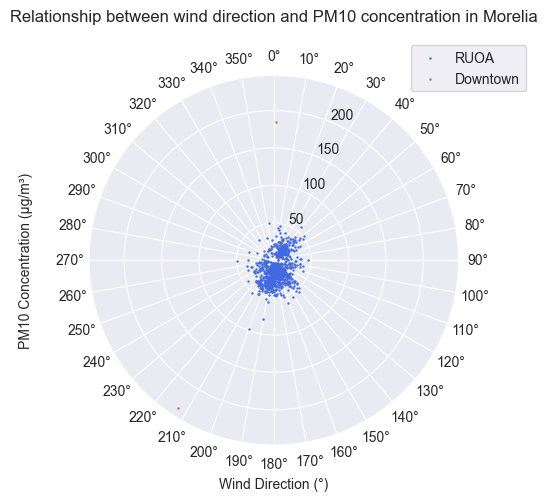

In [23]:
fig, ax = plt.subplots(subplot_kw={'projection':'polar'})

ax.scatter(df["WDir_rad"], df["PM10"], s=0.5, color='royalblue', label="RUOA")
ax.scatter(df["WindDirectionDowntown_Rad"], df["PM10Downtown"], s=0.5, color='chocolate', label="Downtown")

ax.set_theta_zero_location('N')  # 0° en la parte superior
ax.set_theta_direction(-1)  # Sentido horario

ax.set_title("Relationship between wind direction and PM10 concentration in Morelia", pad=20)
ax.set_xlabel("Wind Direction (°)") 
ax.set_ylabel("PM10 Concentration (µg/m³)", labelpad=40)
ax.set_xticks(np.radians([x for x in range(0, 360, 10)]))
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

plt.show()

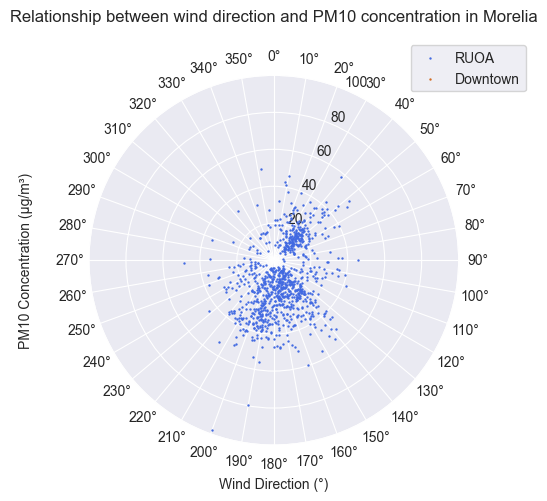

In [24]:
fig, ax = plt.subplots(subplot_kw={'projection':'polar'})

ax.scatter(df["WDir_rad"], df["PM10"], s=0.5, color='royalblue', label="RUOA")
ax.scatter(df["WindDirectionDowntown_Rad"], df["PM10Downtown"], s=0.5, color='chocolate', label="Downtown")

ax.set_theta_zero_location('N')  # 0° en la parte superior
ax.set_theta_direction(-1)  # Sentido horario

ax.set_title("Relationship between wind direction and PM10 concentration in Morelia", pad=20)
ax.set_xlabel("Wind Direction (°)") 
ax.set_ylabel("PM10 Concentration (µg/m³)", labelpad=40)
ax.set_xticks(np.radians([x for x in range(0, 360, 10)]))
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
ax.set_ylim(0, 100)

plt.show()

## PM2.5

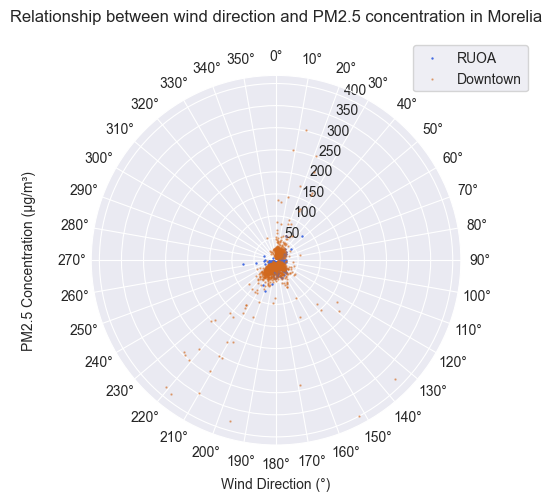

In [32]:
fig, ax = plt.subplots(subplot_kw={'projection':'polar'})

ax.scatter(df["WDir_rad"], df["PM2.5"], s=0.5, alpha=1, color='royalblue', label="RUOA")
ax.scatter(df["WindDirectionDowntown_Rad"], df["PM2.5Downtown"], s=0.5, alpha=0.5, color='chocolate', label="Downtown")

ax.set_theta_zero_location('N')  # 0° en la parte superior
ax.set_theta_direction(-1)  # Sentido horario

ax.set_title("Relationship between wind direction and PM2.5 concentration in Morelia", pad=20)
ax.set_xlabel("Wind Direction (°)") 
ax.set_ylabel("PM2.5 Concentration (µg/m³)", labelpad=40)
ax.set_xticks(np.radians([x for x in range(0, 360, 10)]))
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

plt.show()

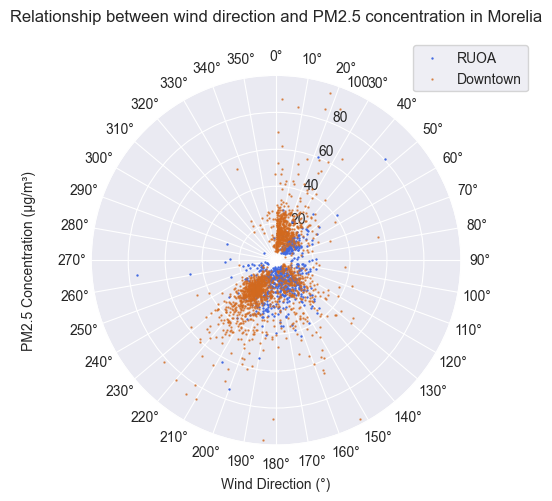

In [38]:
fig, ax = plt.subplots(subplot_kw={'projection':'polar'})

ax.scatter(df["WDir_rad"], df["PM2.5"], s=0.5, alpha=1, color='royalblue', label="RUOA")
ax.scatter(df["WindDirectionDowntown_Rad"], df["PM2.5Downtown"], s=0.5, alpha=0.7, color='chocolate', label="Downtown")

ax.set_theta_zero_location('N')  # 0° en la parte superior
ax.set_theta_direction(-1)  # Sentido horario

ax.set_title("Relationship between wind direction and PM2.5 concentration in Morelia", pad=20)
ax.set_xlabel("Wind Direction (°)") 
ax.set_ylabel("PM2.5 Concentration (µg/m³)", labelpad=40)
ax.set_xticks(np.radians([x for x in range(0, 360, 10)]))
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

ax.set_ylim(0, 100)

plt.show()

## CO

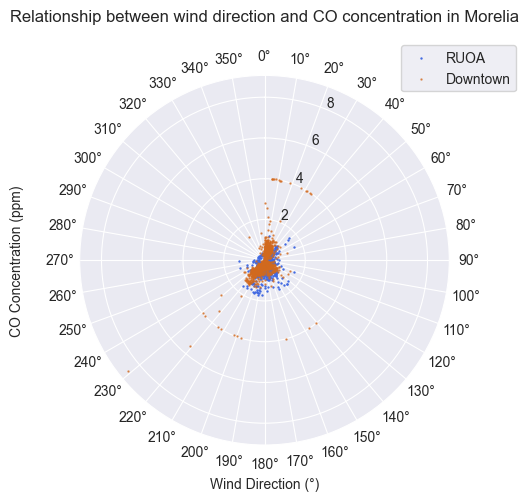

In [39]:
fig, ax = plt.subplots(subplot_kw={'projection':'polar'})

ax.scatter(df["WDir_rad"], df["CO"], s=0.5, alpha=1, color='royalblue', label="RUOA")
ax.scatter(df["WindDirectionDowntown_Rad"], df["CODowntown"], s=0.5, alpha=0.7, color='chocolate', label="Downtown")

ax.set_theta_zero_location('N')  # 0° en la parte superior
ax.set_theta_direction(-1)  # Sentido horario

ax.set_title("Relationship between wind direction and CO concentration in Morelia", pad=20)
ax.set_xlabel("Wind Direction (°)") 
ax.set_ylabel("CO Concentration (ppm)", labelpad=40)
ax.set_xticks(np.radians([x for x in range(0, 360, 10)]))
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

plt.show()

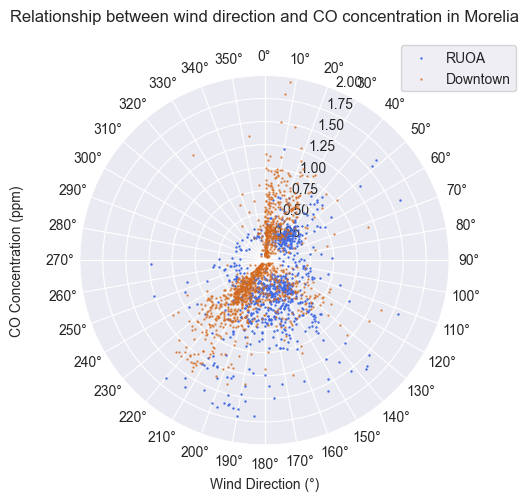

In [40]:
fig, ax = plt.subplots(subplot_kw={'projection':'polar'})

ax.scatter(df["WDir_rad"], df["CO"], s=0.5, alpha=1, color='royalblue', label="RUOA")
ax.scatter(df["WindDirectionDowntown_Rad"], df["CODowntown"], s=0.5, alpha=0.7, color='chocolate', label="Downtown")

ax.set_theta_zero_location('N')  # 0° en la parte superior
ax.set_theta_direction(-1)  # Sentido horario

ax.set_title("Relationship between wind direction and CO concentration in Morelia", pad=20)
ax.set_xlabel("Wind Direction (°)") 
ax.set_ylabel("CO Concentration (ppm)", labelpad=40)
ax.set_xticks(np.radians([x for x in range(0, 360, 10)]))
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

ax.set_ylim(0, 2)

plt.show()

## O3

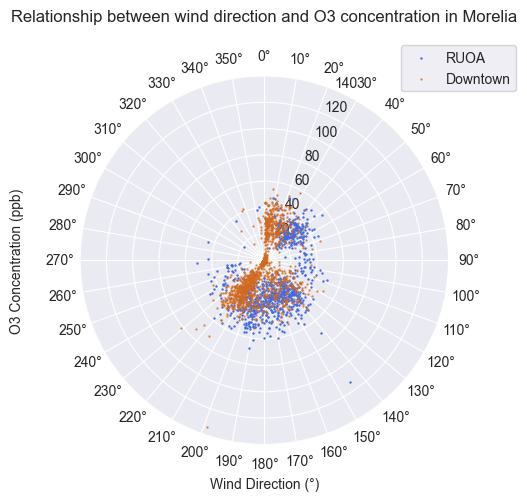

In [41]:
fig, ax = plt.subplots(subplot_kw={'projection':'polar'})

ax.scatter(df["WDir_rad"], df["O3"], s=0.5, alpha=1, color='royalblue', label="RUOA")
ax.scatter(df["WindDirectionDowntown_Rad"], df["O3Downtown"], s=0.5, alpha=0.7, color='chocolate', label="Downtown")

ax.set_theta_zero_location('N')  # 0° en la parte superior
ax.set_theta_direction(-1)  # Sentido horario

ax.set_title("Relationship between wind direction and O3 concentration in Morelia", pad=20)
ax.set_xlabel("Wind Direction (°)") 
ax.set_ylabel("O3 Concentration (ppb)", labelpad=40)
ax.set_xticks(np.radians([x for x in range(0, 360, 10)]))
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

plt.show()

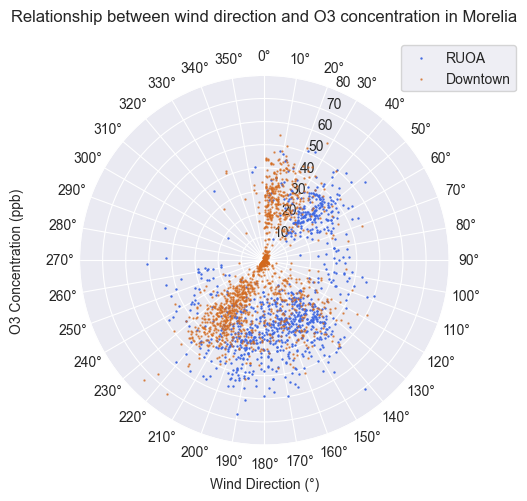

In [42]:
fig, ax = plt.subplots(subplot_kw={'projection':'polar'})

ax.scatter(df["WDir_rad"], df["O3"], s=0.5, alpha=1, color='royalblue', label="RUOA")
ax.scatter(df["WindDirectionDowntown_Rad"], df["O3Downtown"], s=0.5, alpha=0.7, color='chocolate', label="Downtown")

ax.set_theta_zero_location('N')  # 0° en la parte superior
ax.set_theta_direction(-1)  # Sentido horario

ax.set_title("Relationship between wind direction and O3 concentration in Morelia", pad=20)
ax.set_xlabel("Wind Direction (°)") 
ax.set_ylabel("O3 Concentration (ppb)", labelpad=40)
ax.set_xticks(np.radians([x for x in range(0, 360, 10)]))
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

ax.set_ylim(0,80)

plt.show()

## NO

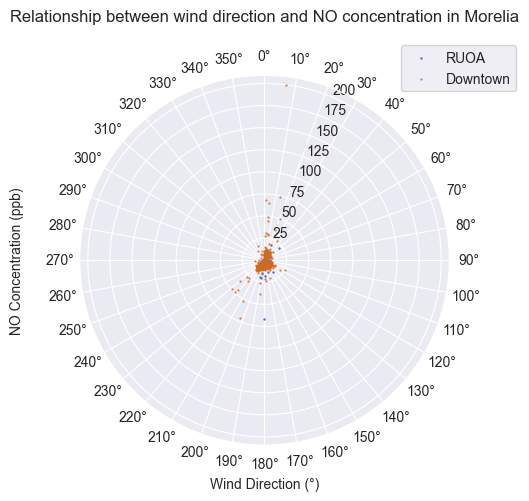

In [43]:
fig, ax = plt.subplots(subplot_kw={'projection':'polar'})

ax.scatter(df["WDir_rad"], df["NO"], s=0.5, alpha=1, color='royalblue', label="RUOA")
ax.scatter(df["WindDirectionDowntown_Rad"], df["NODowntown"], s=0.5, alpha=0.7, color='chocolate', label="Downtown")

ax.set_theta_zero_location('N')  # 0° en la parte superior
ax.set_theta_direction(-1)  # Sentido horario

ax.set_title("Relationship between wind direction and NO concentration in Morelia", pad=20)
ax.set_xlabel("Wind Direction (°)") 
ax.set_ylabel("NO Concentration (ppb)", labelpad=40)
ax.set_xticks(np.radians([x for x in range(0, 360, 10)]))
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

plt.show()

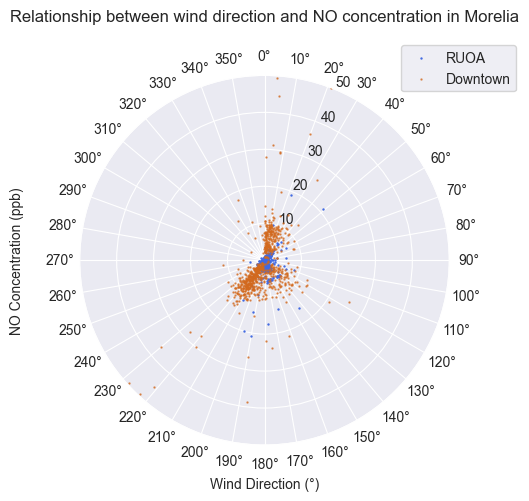

In [44]:
fig, ax = plt.subplots(subplot_kw={'projection':'polar'})

ax.scatter(df["WDir_rad"], df["NO"], s=0.5, alpha=1, color='royalblue', label="RUOA")
ax.scatter(df["WindDirectionDowntown_Rad"], df["NODowntown"], s=0.5, alpha=0.7, color='chocolate', label="Downtown")

ax.set_theta_zero_location('N')  # 0° en la parte superior
ax.set_theta_direction(-1)  # Sentido horario

ax.set_title("Relationship between wind direction and NO concentration in Morelia", pad=20)
ax.set_xlabel("Wind Direction (°)") 
ax.set_ylabel("NO Concentration (ppb)", labelpad=40)
ax.set_xticks(np.radians([x for x in range(0, 360, 10)]))
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

ax.set_ylim(0, 50)

plt.show()

## NO2

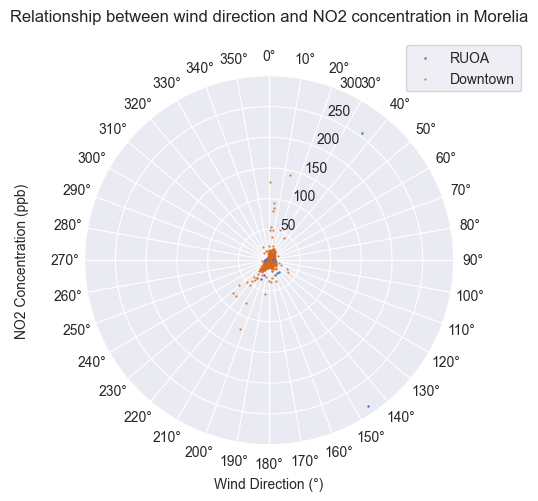

In [45]:
fig, ax = plt.subplots(subplot_kw={'projection':'polar'})

ax.scatter(df["WDir_rad"], df["NO2"], s=0.5, alpha=1, color='royalblue', label="RUOA")
ax.scatter(df["WindDirectionDowntown_Rad"], df["NO2Downtown"], s=0.5, alpha=0.7, color='chocolate', label="Downtown")

ax.set_theta_zero_location('N')  # 0° en la parte superior
ax.set_theta_direction(-1)  # Sentido horario

ax.set_title("Relationship between wind direction and NO2 concentration in Morelia", pad=20)
ax.set_xlabel("Wind Direction (°)") 
ax.set_ylabel("NO2 Concentration (ppb)", labelpad=40)
ax.set_xticks(np.radians([x for x in range(0, 360, 10)]))
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

plt.show()

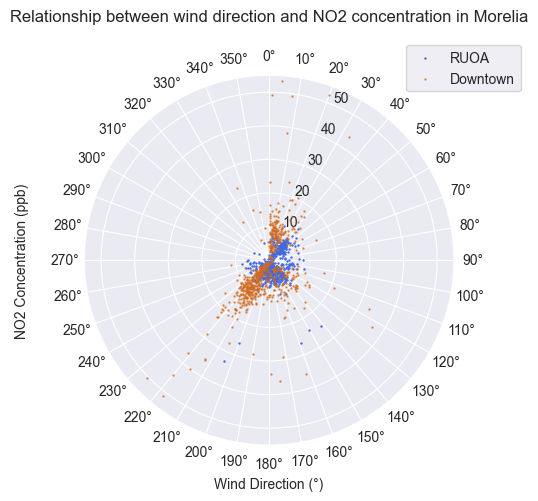

In [48]:
fig, ax = plt.subplots(subplot_kw={'projection':'polar'})

ax.scatter(df["WDir_rad"], df["NO2"], s=0.5, alpha=1, color='royalblue', label="RUOA")
ax.scatter(df["WindDirectionDowntown_Rad"], df["NO2Downtown"], s=0.5, alpha=0.7, color='chocolate', label="Downtown")

ax.set_theta_zero_location('N')  # 0° en la parte superior
ax.set_theta_direction(-1)  # Sentido horario

ax.set_title("Relationship between wind direction and NO2 concentration in Morelia", pad=20)
ax.set_xlabel("Wind Direction (°)") 
ax.set_ylabel("NO2 Concentration (ppb)", labelpad=40)
ax.set_xticks(np.radians([x for x in range(0, 360, 10)]))
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

ax.set_ylim(0, 55)

plt.show()

## SO2

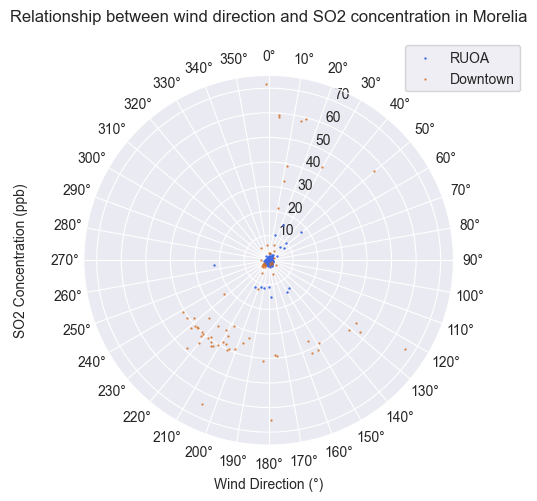

In [49]:
fig, ax = plt.subplots(subplot_kw={'projection':'polar'})

ax.scatter(df["WDir_rad"], df["SO2"], s=0.5, alpha=1, color='royalblue', label="RUOA")
ax.scatter(df["WindDirectionDowntown_Rad"], df["SO2Downtown"], s=0.5, alpha=0.7, color='chocolate', label="Downtown")

ax.set_theta_zero_location('N')  # 0° en la parte superior
ax.set_theta_direction(-1)  # Sentido horario

ax.set_title("Relationship between wind direction and SO2 concentration in Morelia", pad=20)
ax.set_xlabel("Wind Direction (°)") 
ax.set_ylabel("SO2 Concentration (ppb)", labelpad=40)
ax.set_xticks(np.radians([x for x in range(0, 360, 10)]))
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

plt.show()

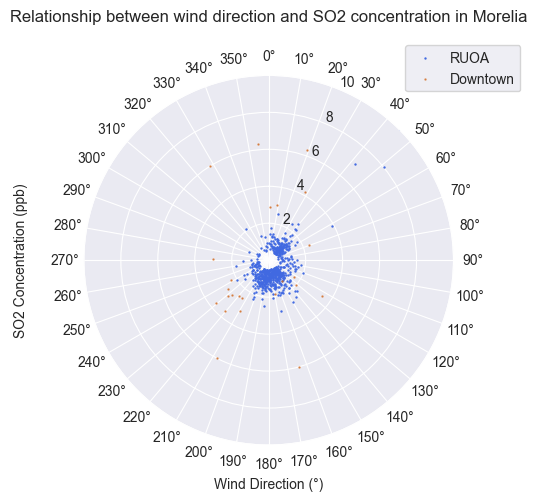

In [50]:
fig, ax = plt.subplots(subplot_kw={'projection':'polar'})

ax.scatter(df["WDir_rad"], df["SO2"], s=0.5, alpha=1, color='royalblue', label="RUOA")
ax.scatter(df["WindDirectionDowntown_Rad"], df["SO2Downtown"], s=0.5, alpha=0.7, color='chocolate', label="Downtown")

ax.set_theta_zero_location('N')  # 0° en la parte superior
ax.set_theta_direction(-1)  # Sentido horario

ax.set_title("Relationship between wind direction and SO2 concentration in Morelia", pad=20)
ax.set_xlabel("Wind Direction (°)") 
ax.set_ylabel("SO2 Concentration (ppb)", labelpad=40)
ax.set_xticks(np.radians([x for x in range(0, 360, 10)]))
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

ax.set_ylim(0, 10)

plt.show()

# Season

In [52]:
seasons_data = {
    "Winter": {"df": df[df["Season"] == "Winter"]},
    "Spring": {"df": df[df["Season"] == "Spring"]},
    "Summer": {"df": df[df["Season"] == "Summer"]},
    "Fall":   {"df": df[df["Season"] == "Fall"]}
}

## PM10

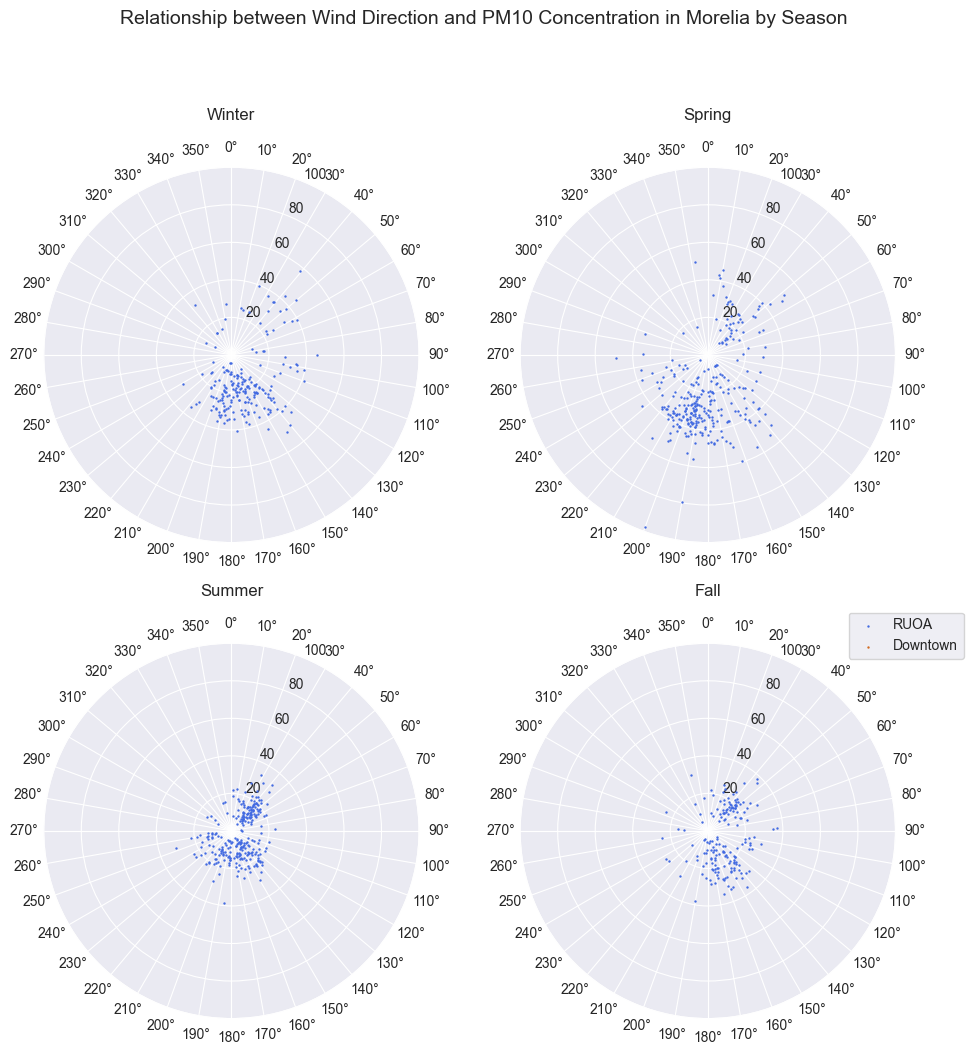

In [57]:
fig, axes = plt.subplots(2, 2, subplot_kw={'projection': 'polar'}, figsize=(10, 10))
fig.suptitle("Relationship between Wind Direction and PM10 Concentration in Morelia by Season", fontsize=14, y=1.05)

for ax, (season, data) in zip(axes.flat, seasons_data.items()):
    df = data["df"]

    ax.scatter(df["WDir_rad"], df["PM10"], s=0.5, color='royalblue', label="RUOA")
    ax.scatter(df["WindDirectionDowntown_Rad"], df["PM10Downtown"], s=0.5, color='chocolate', label="Downtown")
    ax.set_theta_zero_location('N')  
    ax.set_theta_direction(-1)  
    ax.set_ylim(0, 100)
    ax.set_title(f"{season}", pad=15, fontsize=12)
    ax.set_xticks(np.radians([x for x in range(0, 360, 10)]))

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()

## PM2.5

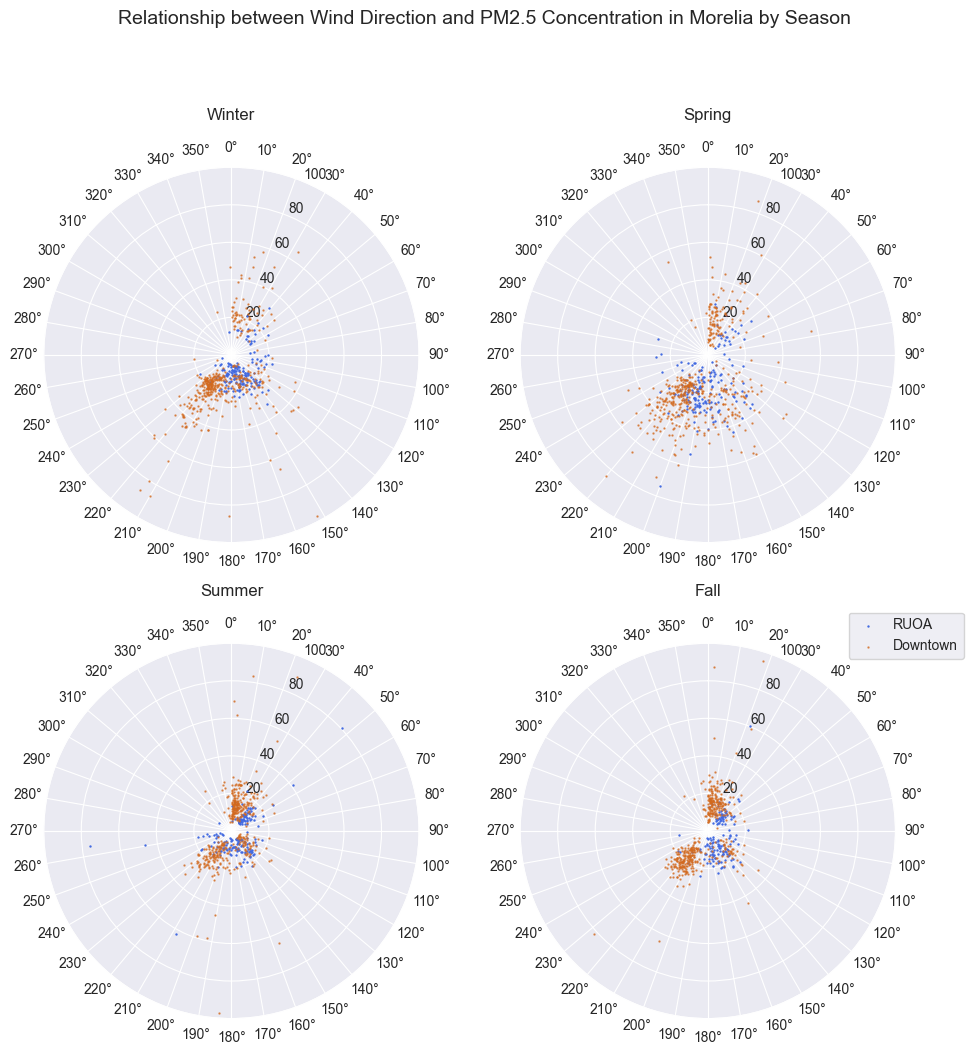

In [58]:
fig, axes = plt.subplots(2, 2, subplot_kw={'projection': 'polar'}, figsize=(10, 10))
fig.suptitle("Relationship between Wind Direction and PM2.5 Concentration in Morelia by Season", fontsize=14, y=1.05)

for ax, (season, data) in zip(axes.flat, seasons_data.items()):
    df = data["df"]

    ax.scatter(df["WDir_rad"], df["PM2.5"], s=0.5, color='royalblue', label="RUOA")
    ax.scatter(df["WindDirectionDowntown_Rad"], df["PM2.5Downtown"], s=0.5, alpha=0.7, color='chocolate', label="Downtown")
    ax.set_theta_zero_location('N')  
    ax.set_theta_direction(-1)  
    ax.set_ylim(0, 100)
    ax.set_title(f"{season}", pad=15, fontsize=12)
    ax.set_xticks(np.radians([x for x in range(0, 360, 10)]))

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()

## CO

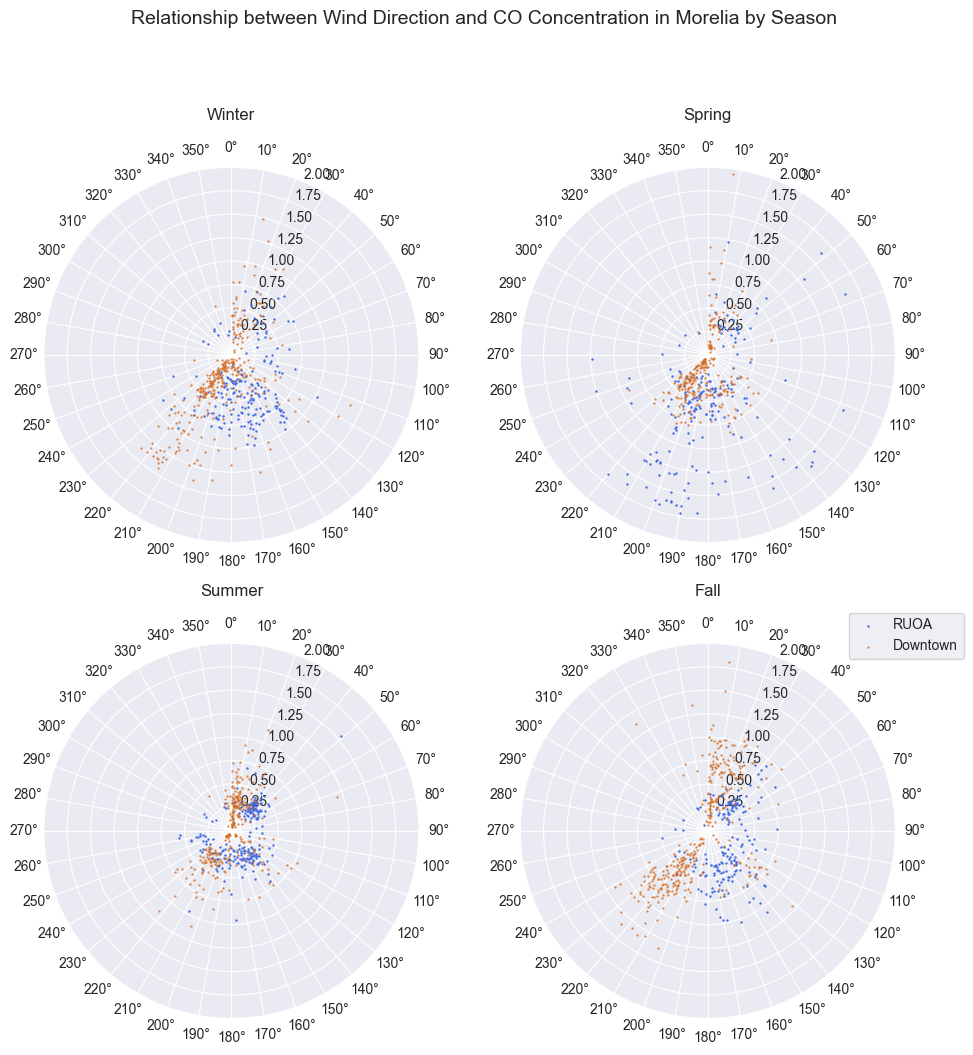

In [60]:
fig, axes = plt.subplots(2, 2, subplot_kw={'projection': 'polar'}, figsize=(10, 10))
fig.suptitle("Relationship between Wind Direction and CO Concentration in Morelia by Season", fontsize=14, y=1.05)

for ax, (season, data) in zip(axes.flat, seasons_data.items()):
    df = data["df"]

    ax.scatter(df["WDir_rad"], df["CO"], s=0.5, color='royalblue', label="RUOA")
    ax.scatter(df["WindDirectionDowntown_Rad"], df["CODowntown"], s=0.5, alpha=0.7, color='chocolate', label="Downtown")
    ax.set_theta_zero_location('N')  
    ax.set_theta_direction(-1)  
    ax.set_ylim(0, 2)
    ax.set_title(f"{season}", pad=15, fontsize=12)
    ax.set_xticks(np.radians([x for x in range(0, 360, 10)]))

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()

## O3

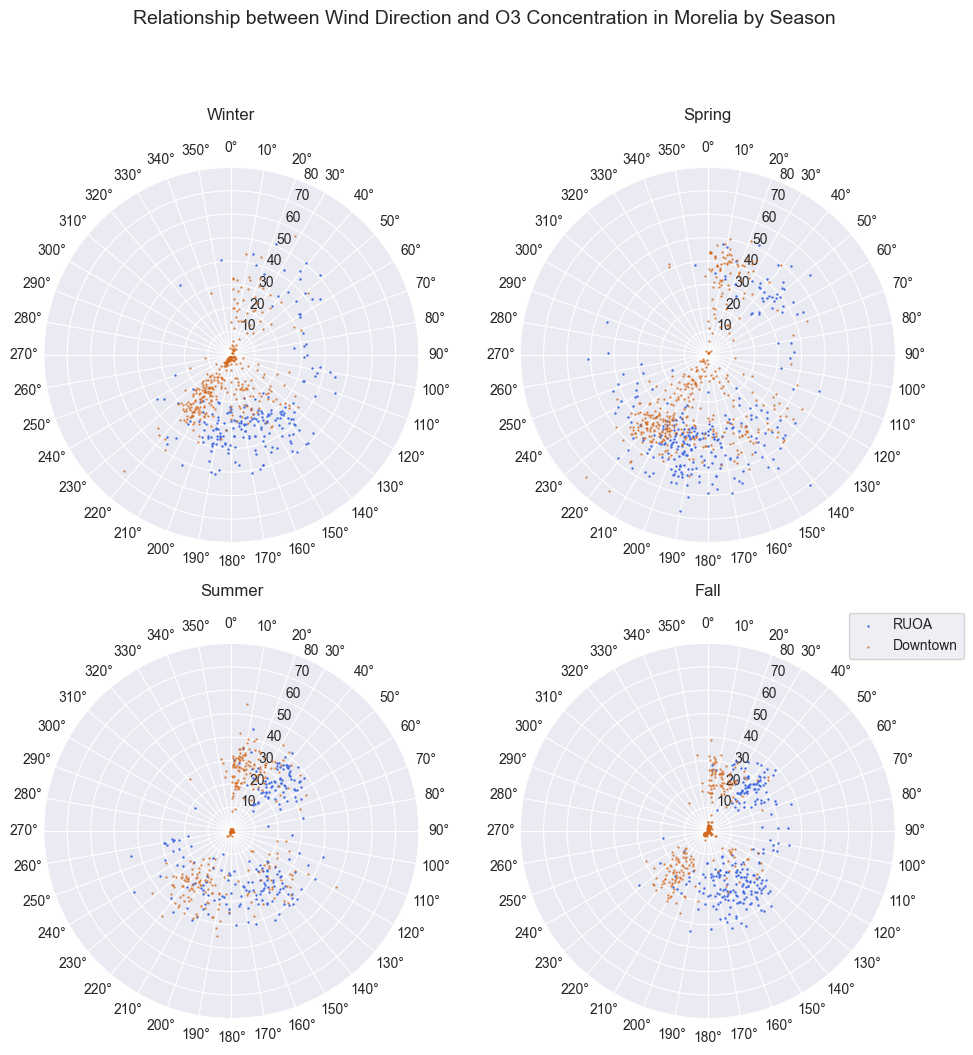

In [61]:
fig, axes = plt.subplots(2, 2, subplot_kw={'projection': 'polar'}, figsize=(10, 10))
fig.suptitle("Relationship between Wind Direction and O3 Concentration in Morelia by Season", fontsize=14, y=1.05)

for ax, (season, data) in zip(axes.flat, seasons_data.items()):
    df = data["df"]

    ax.scatter(df["WDir_rad"], df["O3"], s=0.5, color='royalblue', label="RUOA")
    ax.scatter(df["WindDirectionDowntown_Rad"], df["O3Downtown"], s=0.5, alpha=0.7, color='chocolate', label="Downtown")
    ax.set_theta_zero_location('N')  
    ax.set_theta_direction(-1)  
    ax.set_ylim(0, 80)
    ax.set_title(f"{season}", pad=15, fontsize=12)
    ax.set_xticks(np.radians([x for x in range(0, 360, 10)]))

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()

## NO

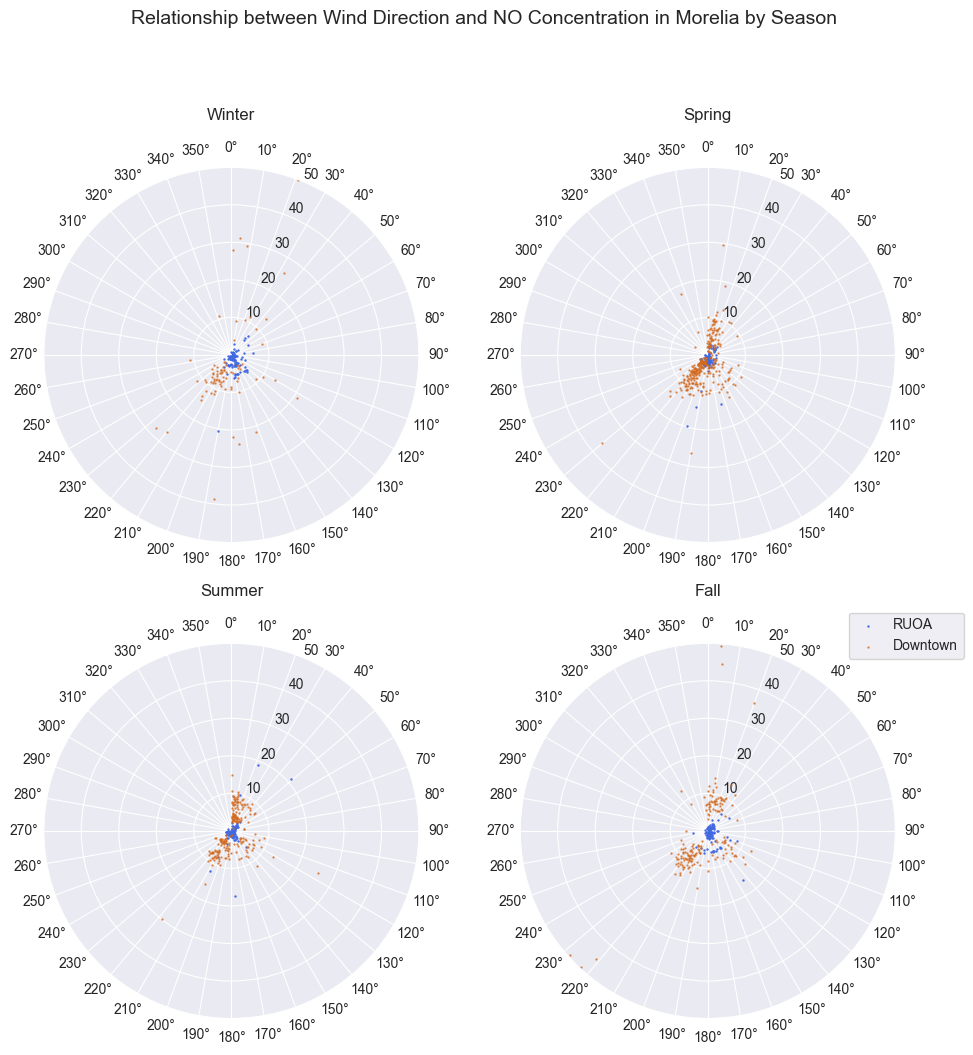

In [62]:
fig, axes = plt.subplots(2, 2, subplot_kw={'projection': 'polar'}, figsize=(10, 10))
fig.suptitle("Relationship between Wind Direction and NO Concentration in Morelia by Season", fontsize=14, y=1.05)

for ax, (season, data) in zip(axes.flat, seasons_data.items()):
    df = data["df"]

    ax.scatter(df["WDir_rad"], df["NO"], s=0.5, color='royalblue', label="RUOA")
    ax.scatter(df["WindDirectionDowntown_Rad"], df["NODowntown"], s=0.5, alpha=0.7, color='chocolate', label="Downtown")
    ax.set_theta_zero_location('N')  
    ax.set_theta_direction(-1)  
    ax.set_ylim(0, 50)
    ax.set_title(f"{season}", pad=15, fontsize=12)
    ax.set_xticks(np.radians([x for x in range(0, 360, 10)]))

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()

## NO2

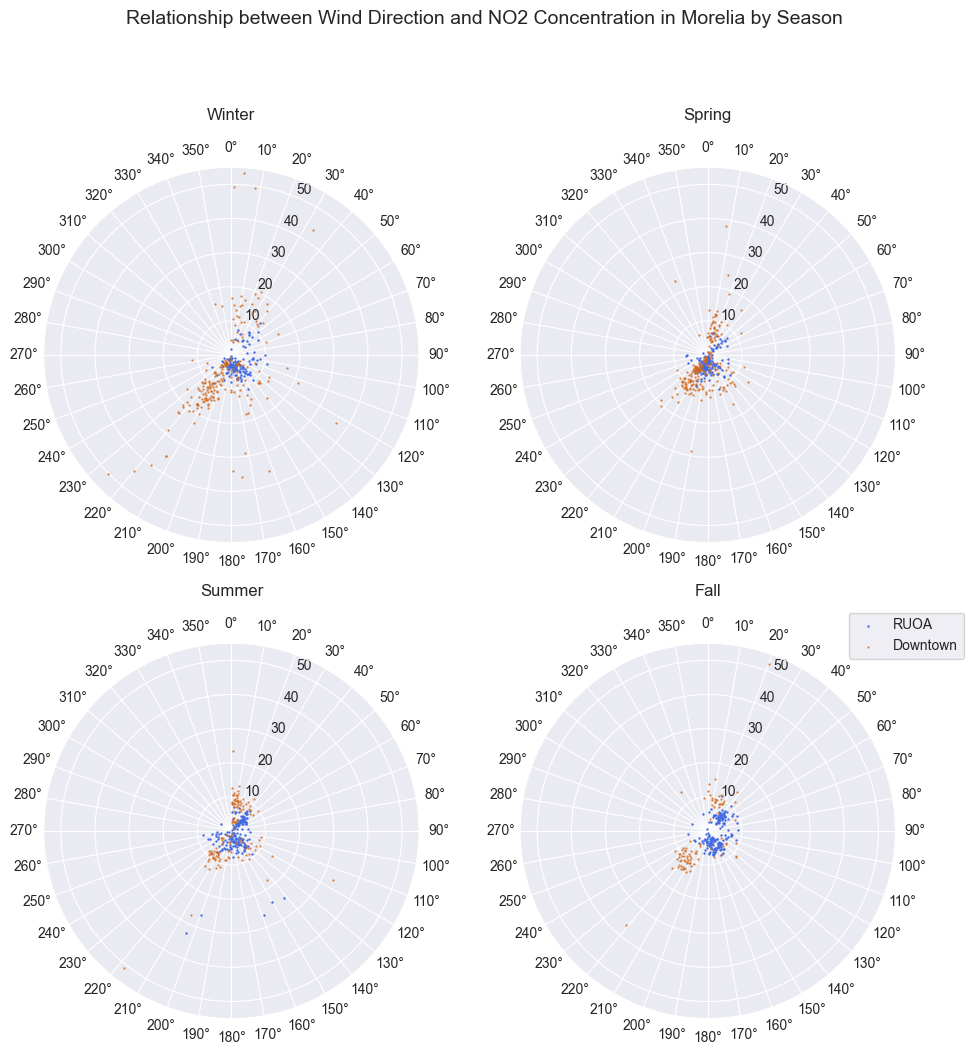

In [63]:
fig, axes = plt.subplots(2, 2, subplot_kw={'projection': 'polar'}, figsize=(10, 10))
fig.suptitle("Relationship between Wind Direction and NO2 Concentration in Morelia by Season", fontsize=14, y=1.05)

for ax, (season, data) in zip(axes.flat, seasons_data.items()):
    df = data["df"]

    ax.scatter(df["WDir_rad"], df["NO2"], s=0.5, color='royalblue', label="RUOA")
    ax.scatter(df["WindDirectionDowntown_Rad"], df["NO2Downtown"], s=0.5, alpha=0.7, color='chocolate', label="Downtown")
    ax.set_theta_zero_location('N')  
    ax.set_theta_direction(-1)  
    ax.set_ylim(0, 55)
    ax.set_title(f"{season}", pad=15, fontsize=12)
    ax.set_xticks(np.radians([x for x in range(0, 360, 10)]))

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()

## SO2

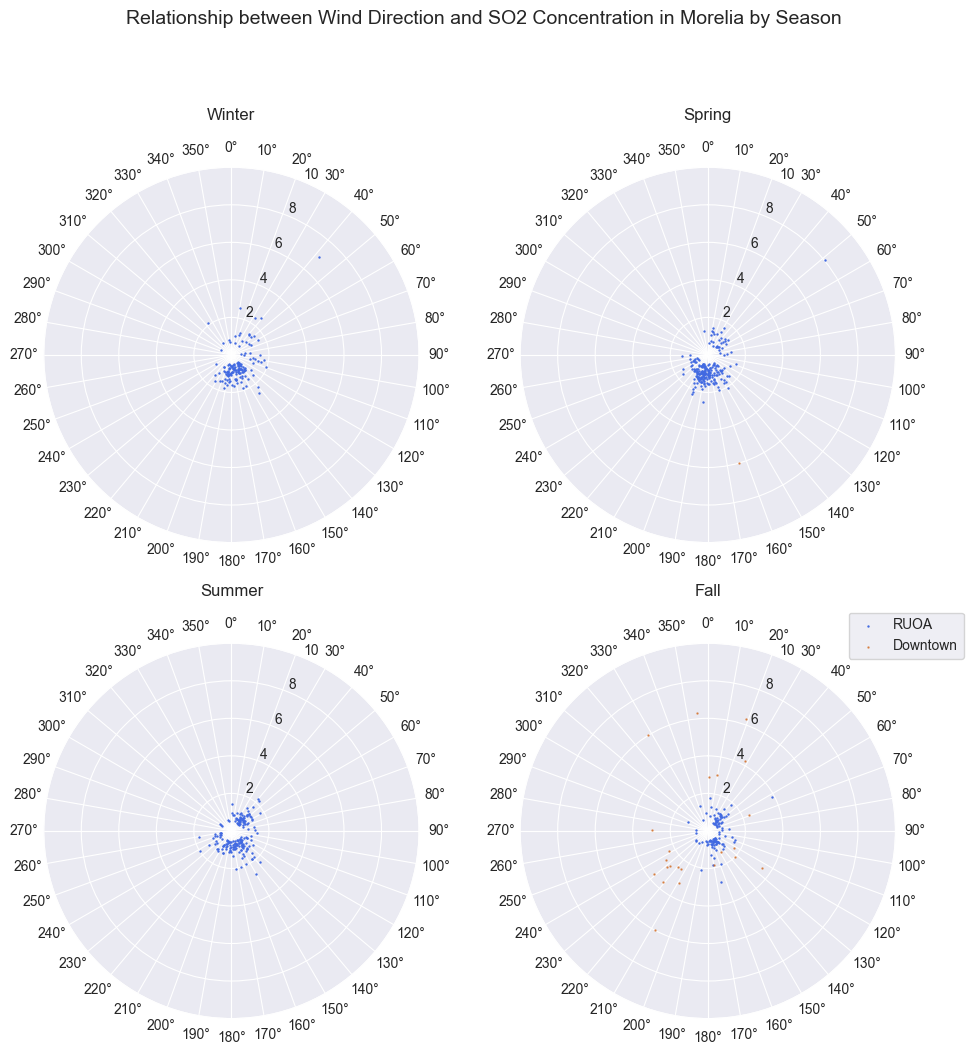

In [65]:
fig, axes = plt.subplots(2, 2, subplot_kw={'projection': 'polar'}, figsize=(10, 10))
fig.suptitle("Relationship between Wind Direction and SO2 Concentration in Morelia by Season", fontsize=14, y=1.05)

for ax, (season, data) in zip(axes.flat, seasons_data.items()):
    df = data["df"]

    ax.scatter(df["WDir_rad"], df["SO2"], s=0.5, color='royalblue', label="RUOA")
    ax.scatter(df["WindDirectionDowntown_Rad"], df["SO2Downtown"], s=0.5, alpha=0.7, color='chocolate', label="Downtown")
    ax.set_theta_zero_location('N')  
    ax.set_theta_direction(-1)  
    ax.set_ylim(0, 10)
    ax.set_title(f"{season}", pad=15, fontsize=12)
    ax.set_xticks(np.radians([x for x in range(0, 360, 10)]))

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()